In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = yf.download('BTC-USD', start = '2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [18]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
...,...,...,...,...,...,...
2022-03-05,39148.449219,39566.335938,38777.035156,39400.585938,39400.585938,16975917450
2022-03-06,39404.199219,39640.175781,38211.648438,38419.984375,38419.984375,19745229902
2022-03-07,38429.304688,39430.226562,37260.203125,38062.039062,38062.039062,28546143503


In [19]:
df['MA30'] = df['Adj Close'].rolling(30).mean()
df['MA60'] = df['Adj Close'].rolling(60).mean()

In [20]:
df = df.dropna()

In [21]:
df

,Open,High,Low,Close,Adj Close,Volume,MA30,MA60
Date,,,,,,,,
2020-02-29,8671.212891,8775.631836,8599.508789,8599.508789,8599.508789,35792392544,9621.382422,8989.305469
2020-03-01,8599.758789,8726.796875,8471.212891,8562.454102,8562.454102,35349164300,9595.113249,9012.010132
2020-03-02,8563.264648,8921.308594,8532.630859,8869.669922,8869.669922,42857674409,9577.673079,9043.413460
2020-03-03,8865.387695,8901.598633,8704.990234,8787.786133,8787.786133,42386715821,9559.120443,9067.461825
2020-03-04,8788.541992,8843.366211,8712.431641,8755.246094,8755.246094,34746706368,9541.177930,9089.871647
...,...,...,...,...,...,...,...,...
2022-03-05,39148.449219,39566.335938,38777.035156,39400.585938,39400.585938,16975917450,41259.838281,40630.089648
2022-03-06,39404.199219,39640.175781,38211.648438,38419.984375,38419.984375,19745229902,41157.141927,40544.272656
2022-03-07,38429.304688,39430.226562,37260.203125,38062.039062,38062.039062,28546143503,41044.504427,40459.291146


In [22]:
df = df[['Adj Close','MA30','MA60']]

In [23]:
df

,Adj Close,MA30,MA60
Date,,,
2020-02-29,8599.508789,9621.382422,8989.305469
2020-03-01,8562.454102,9595.113249,9012.010132
2020-03-02,8869.669922,9577.673079,9043.413460
2020-03-03,8787.786133,9559.120443,9067.461825
2020-03-04,8755.246094,9541.177930,9089.871647
...,...,...,...
2022-03-05,39400.585938,41259.838281,40630.089648
2022-03-06,38419.984375,41157.141927,40544.272656
2022-03-07,38062.039062,41044.504427,40459.291146


In [24]:
Buy = []
Sell = []

for i in range(len(df)):
    if df.MA30.iloc[i] > df.MA60.iloc[i] \
    and df.MA30.iloc[i-1] < df.MA60.iloc[i-1]:
        Buy.append(i)
    elif df.MA30.iloc[i] < df.MA60.iloc[i] \
    and df.MA30.iloc[i-1] > df.MA60.iloc[i-1]:
            Sell.append(i)

In [25]:
Buy

[59, 152, 234, 523, 592, 732]

In [26]:
Sell

[12, 127, 201, 432, 580, 644]

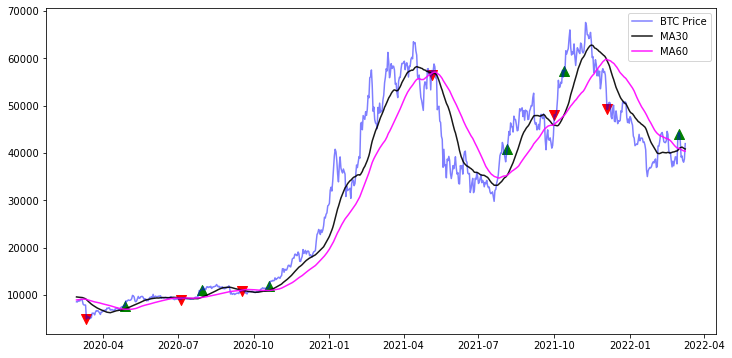

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df['Adj Close'], label = 'BTC Price', color = 'blue', alpha = 0.5)
plt.plot(df['MA30'], label = 'MA30', color = 'k', alpha = 0.9)
plt.plot(df['MA60'], label = 'MA60', color = 'magenta', alpha = 0.9)
plt.scatter(df.iloc[Buy].index, df.iloc[Buy]['Adj Close'], marker = '^', color = 'g', s = 100)
plt.scatter(df.iloc[Sell].index, df.iloc[Sell]['Adj Close'], marker = 'v', color = 'r', s = 100)
plt.legend()
plt.show()